<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Данные-о-договорах" data-toc-modified-id="Данные-о-договорах-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные о договорах</a></span></li><li><span><a href="#Персональные-данные-клиентов" data-toc-modified-id="Персональные-данные-клиентов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Персональные данные клиентов</a></span></li><li><span><a href="#Информация-об-интернет-услугах" data-toc-modified-id="Информация-об-интернет-услугах-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Информация об интернет-услугах</a></span></li><li><span><a href="#Информация-об-услугах-телефонии" data-toc-modified-id="Информация-об-услугах-телефонии-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Информация об услугах телефонии</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-аномалий" data-toc-modified-id="Обработка-аномалий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка аномалий</a></span></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Создание новых признаков</a></span></li><li><span><a href="#Удаление-ненужных-признаков" data-toc-modified-id="Удаление-ненужных-признаков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Удаление ненужных признаков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Корреляция признаков</a></span></li><li><span><a href="#Баланс-классов-выборки" data-toc-modified-id="Баланс-классов-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Баланс классов выборки</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

In [1]:
!pip install association-metrics

## Изучение данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import association_metrics as am

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


warnings.filterwarnings("ignore")
RANDOM_STATE=240423

### Данные о договорах

In [3]:
try: df_contract = pd.read_csv('contract_new.csv')
except: df_contract = pd.read_csv('/datasets/contract_new.csv')
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [6]:
df_contract[df_contract == ' '].count()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

В столбце *TotalCharges* есть пропуски, заполненные пробелом

In [7]:
df_contract[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Необходимо привести значения в столбцах *BeginDate* и *EndDate* к типу datetime.

В столбце *TotalCharges* привести значения к численному типу

Необходимо обработать пропуски в столбце *TotalCharges*

### Персональные данные клиентов

In [8]:
try: df_personal = pd.read_csv('personal_new.csv')
except: df_personal = pd.read_csv('/datasets/personal_new.csv')
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
df_personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
df_personal[df_personal == ' '].count()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Пропусков в данных нет

### Информация об интернет-услугах

In [12]:
try: df_internet = pd.read_csv('internet_new.csv')
except: df_internet = pd.read_csv('/datasets/internet_new.csv')
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [13]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [14]:
df_internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [15]:
df_internet[df_internet == ' '].count()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Пропусков в данных нет

### Информация об услугах телефонии

In [16]:
try: df_phone = pd.read_csv('phone_new.csv')
except: df_phone = pd.read_csv('/datasets/phone_new.csv')
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [17]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [18]:
df_phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [19]:
df_phone[df_phone == ' '].count()

customerID       0
MultipleLines    0
dtype: int64

Пропусков в данных нет

## Предобработка данных

Объединим все данные в одну таблицу

In [20]:
df = df_contract.merge(df_personal, how='left', on='customerID') \
                .merge(df_internet, how='left', on='customerID')\
                .merge(df_phone, how='left', on='customerID')
df.shape

(7043, 20)

Определим также целевой признак. Если в столбце *EndDate* есть дата, то клиент ушел, иначе - нет.

In [21]:
df['left'] = (df['EndDate'] != 'No').astype(int)

### Обработка пропусков

Посмотрим еще раз на пропуски в столбце *TotalCharges*

In [22]:
df_contract[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Можно заметить, что в строках с пропуском дата начала пользования услугами совпадает с датой выгрузки данных (2020-02-01). Значит, что это совсем новые клиенты и их затраты на услуги пока что равны 0. Заполним пропуски нулями

In [23]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = '0'
df['TotalCharges'][df['TotalCharges'] == ' '].count()

0

Посмотрим на наличие пропусков в объединенной таблице в других столбцах

In [24]:
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
left                   0
dtype: int64

Видно, что есть пропуски в столбцах с подключенными услугами (помимо столбца *TotalCharges*). Можно предположить, что пропуск означает, что у клинета услуга не подключена. Заменим пропуски на *'No'*

In [25]:
df = df.fillna('No')
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
left                0
dtype: int64

### Изменение типов данных

Заменим в столбце *EndDate* значения *'No'* на дату выгрузки данных (2020-02-01)

In [26]:
df['EndDate'] = df['EndDate'].replace('No', '2020-02-01')

Приведем столбцы *BeginDate* и *EndDate* в тип datetime

In [27]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Приведем данные в столбце TotalCharges к численному типу 

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

### Обработка аномалий

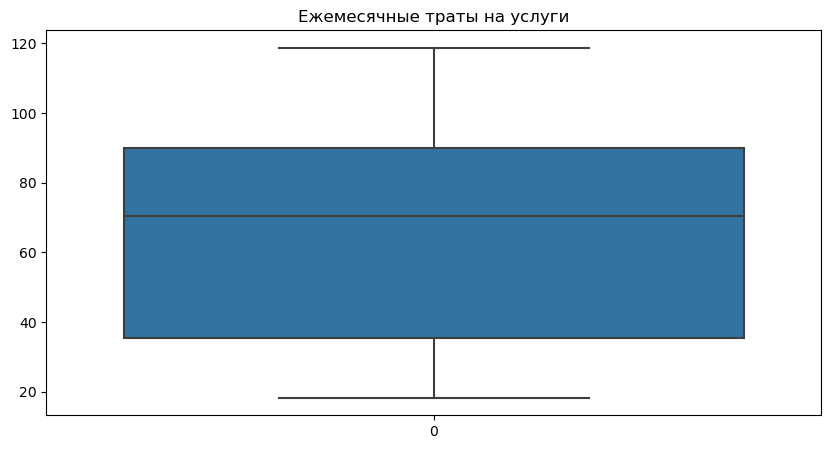

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df['MonthlyCharges'])
plt.title('Ежемесячные траты на услуги')
plt.show()

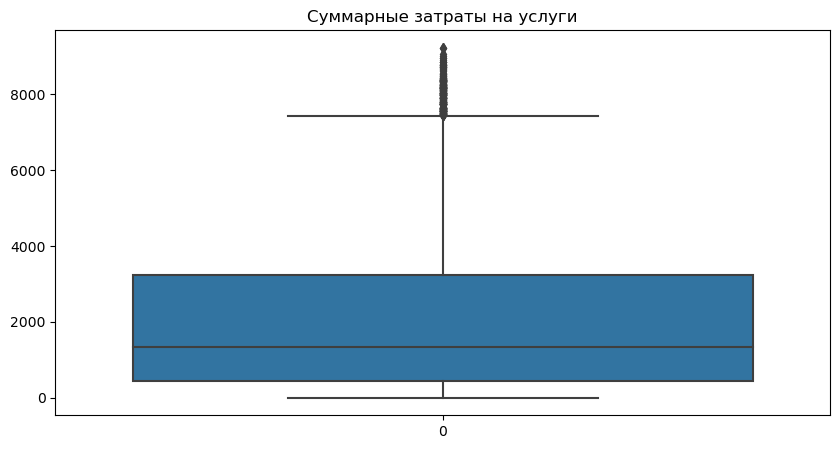

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df['TotalCharges'])
plt.title('Суммарные затраты на услуги')
plt.show()

Рассмотрим 0.975-й квантиль

In [31]:
df['TotalCharges'].quantile(0.975)

7537.2225

Рассмотрим клиентов, у которых общие затраты за услуги превышают это значение

In [32]:
cols = ['BeginDate', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines',
        'MonthlyCharges', 'TotalCharges', 'left']

In [33]:
df.loc[:, cols][df['TotalCharges'] > df['TotalCharges'].quantile(0.975)].head()

,BeginDate,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,MonthlyCharges,TotalCharges,left
17,2014-03-01,Fiber optic,Yes,No,Yes,No,Yes,Yes,Yes,106.70,8257.51,0
57,2014-08-01,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,108.45,7730.32,0
59,2014-02-01,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,107.50,7740.00,0
198,2014-02-01,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,112.25,8324.46,0
369,2014-02-01,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,112.60,8755.78,0


Количество ушедших клиентов

In [34]:
df.loc[:, 'left'][df['TotalCharges'] > df['TotalCharges'].quantile(0.975)].value_counts()

0    174
1      3
Name: left, dtype: int64

Самая ранняя дата окончания пользования услугами среди "аномальных" клиентов

In [35]:
df.loc[:, 'EndDate'][df['TotalCharges'] > df['TotalCharges'].quantile(0.975)].min()

Timestamp('2019-05-01 00:00:00')

Самая поздняя дата начала пользования услугами среди "аномальных" клиентов

In [36]:
df.loc[:, 'BeginDate'][df['TotalCharges'] > df['TotalCharges'].quantile(0.975)].max()

Timestamp('2015-02-01 00:00:00')

У клиентов с такими большими большими суммарными тратами подключено большое количество услуг, а так же они являются(-лись) клиентами на протяжении долгих лет. Эти данные нельзя назвать выбросами

Рассмотрим столбец *EndDate*

In [37]:
df.loc[:, 'EndDate'].max()

Timestamp('2020-02-01 00:00:00')

Видно, что нет записей, где клиенты бы ушли позже, чем были выгружены данные

### Создание новых признаков

Признаки даты начала и окончания пользования услугами не очень показательны. Добавим новый признак: продолжительность пользования услугами

In [38]:
df['duration'] = (df['EndDate'] - df['BeginDate']) / np.timedelta64 ( 1 , 'D') # количество дней пользования
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,left,duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,DSL,No,Yes,No,No,No,No,No,0,31.0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,1036.0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,0,123.0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,0,1371.0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,Fiber optic,No,No,No,No,No,No,No,0,153.0


### Удаление ненужных признаков

Разделим признаки и целевой признак

In [39]:
target = df['left'] # целевой признак
features = df.drop('left', axis=1) # признаки

Чтобы избежать утечки данных удалим столбцы *BeginDate* и *EndDate* из признаков

In [40]:
features = features.drop(['BeginDate', 'EndDate'], axis=1)
features.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31.0
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123.0
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371.0
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,153.0


Удалим также столбец с id клиентов. При обучении он не понадобится

In [41]:
features = features.drop(['customerID'], axis=1)
features.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,duration
0,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31.0
1,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123.0
3,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371.0
4,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,153.0


## Анализ данных

### Корреляция признаков

**Обозначим категориальные и численные признаки**

In [42]:
cat_cols = features.select_dtypes(include='object').columns.to_list() # список категориальных признаков
num_features = features.select_dtypes(exclude='object').columns.to_list() # список численных признаков
num_features.remove('SeniorCitizen') # признак SeniorCitizen является категориальным бинарным признаком
# удаляем его из списка численных

Рассмотрим корреляцию численных признаков

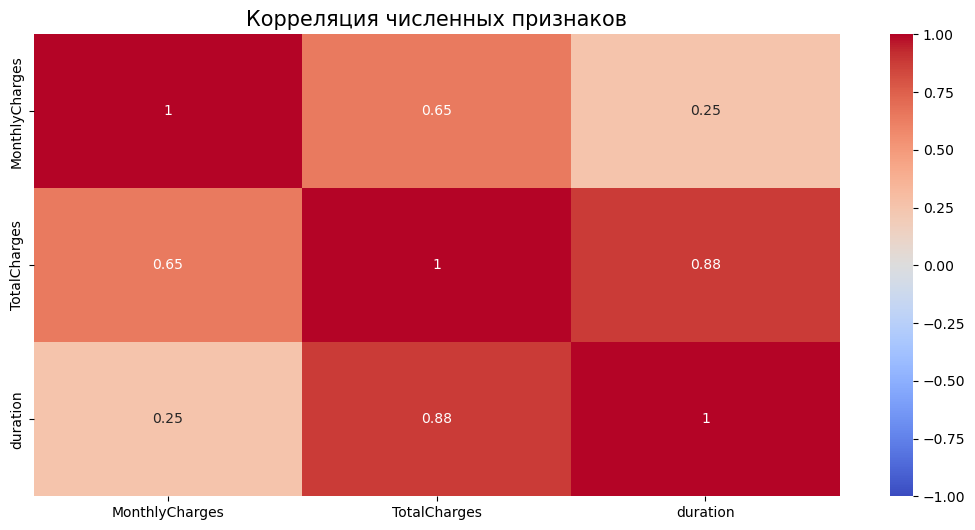

In [43]:
plt.figure(figsize=(13, 6))  # используем корреляцию Спирмена
sns.heatmap(df[num_features].corr(method='spearman'),
            vmin=-1,
            vmax=+1,
            annot=True,
            cmap='coolwarm')
plt.title('Корреляция численных признаков', fontsize=15)
plt.show()

По тепловой карте корреляций видна сильная связь между Суммарными тратами на услуги (*TotalCharges*) и Продолжительностью пользования услугами (*duration*), а также достаточно сильная связь между Ежемесячными тратами (*MonthlyCharges*) и Суммарными (*TotalCharges*). Удалим столбец *TotalCharges*

In [44]:
features = features.drop('TotalCharges', axis=1)

In [45]:
del num_features[num_features.index('TotalCharges')]

**Рассмотрим корреляцию категориальных признаков**

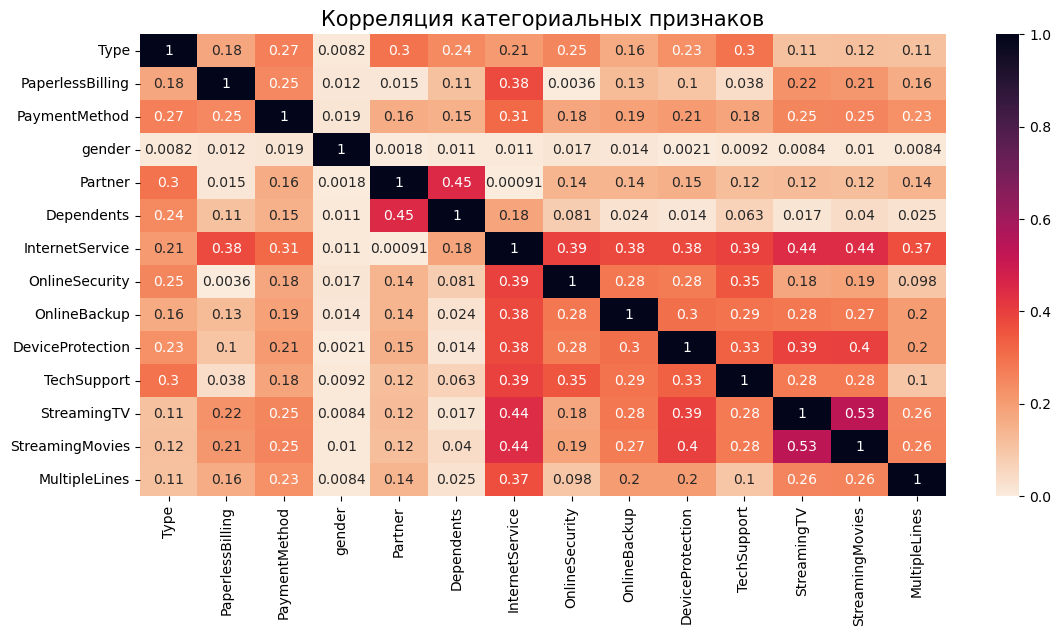

In [46]:
df = df.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

cramersv = am.CramersV(df.drop('customerID', axis=1)) # корреляция Крамера
cramersv.fit()

plt.figure(figsize=(13,6))
sns.heatmap(cramersv.fit(),
            vmin=0,
            vmax=+1,
            annot=True,
            cmap='rocket_r')
plt.title('Корреляция категориальных признаков', fontsize=15)
plt.show()

Среди категориальных признаков присутствует относительно сильная связь между Стриминговым телевидением (*StreaminTV*) и Каталогом фильмов (*StreaminMovies*), однако не настолько сильная, чтобы удалять признаки

### Баланс классов выборки

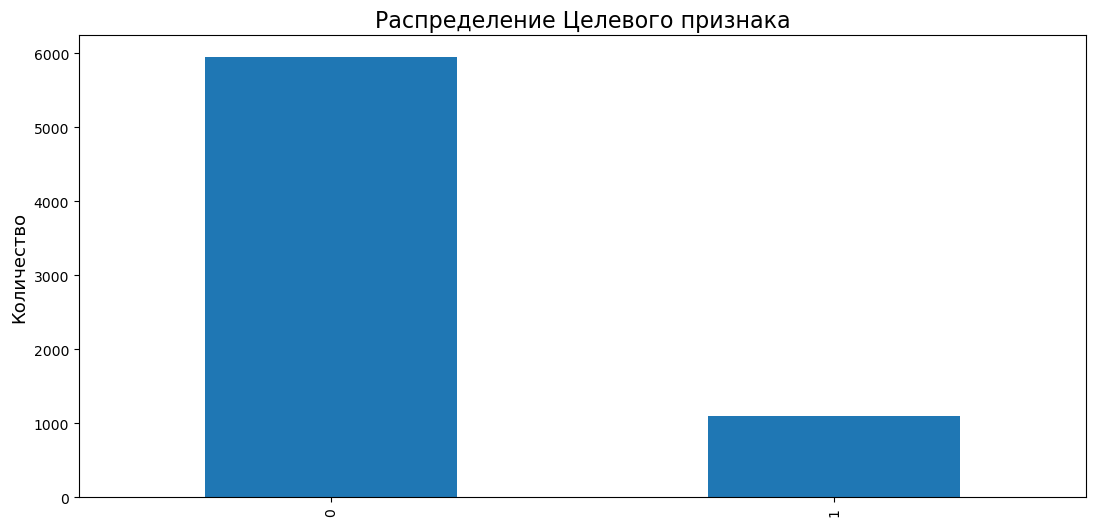

0    0.843675
1    0.156325
Name: left, dtype: float64

In [47]:
plt.figure(figsize=(13,6))
df['left'].value_counts().plot(kind='bar')
plt.title('Распределение Целевого признака', fontsize=16)
plt.ylabel('Количество', fontsize=13)
plt.show()
target.value_counts(normalize=1)

По графику видно, что в выборке присутствует явный дисбаланс классов - количество оставшихся клиентов ~85%.

## Обучение моделей

**Разобъем на тренировочную и тестовую выборки**

In [48]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=RANDOM_STATE)

In [49]:
print(f'Размер обучающей выборки: {features_train.shape}')
print(f'Размер тестовой выборки: {features_test.shape}')

Размер обучающей выборки: (5282, 17)
Размер тестовой выборки: (1761, 17)


**Функция для кодирования и стандартизации призаков**

In [50]:
col_transformer = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'), 
        cat_cols
    ),
    (
        StandardScaler(), 
        num_features
    ),
    remainder='passthrough'
)

### LogisticRegression

In [51]:
%%time


logistic_model = LogisticRegression()

pipline_log = make_pipeline(col_transformer, logistic_model)

params = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__C':[1, 10, 100, 1000],
    'logisticregression__penalty':['none', 'l1', 'l2'],
    'logisticregression__class_weight': ['balanced'],
    'logisticregression__random_state': [RANDOM_STATE]
}

grid_log = GridSearchCV(
    pipline_log, 
    params,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)
grid_log.fit(features_train, target_train)

logistic_model_score = grid_log.best_score_
best_params = grid_log.best_params_
print()
print(f'''Параметры лучшей модели: {grid_log.best_params_}''')
print(f'''Значение метрики AUC-ROC на обучающей выборке для LogisticRegression: {logistic_model_score}''')


Параметры лучшей модели: {'logisticregression__C': 10, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__random_state': 240423, 'logisticregression__solver': 'saga'}
Значение метрики AUC-ROC на обучающей выборке для LogisticRegression: 0.750687627777646
CPU times: total: 859 ms
Wall time: 3.82 s


### RandomForestClassifier

In [52]:
%%time


forest_model = RandomForestClassifier()

pipline_rf = make_pipeline(col_transformer, forest_model)

params = {
    'randomforestclassifier__n_estimators': range(50, 151, 10),
    'randomforestclassifier__max_depth': range(10, 31, 4),
    'randomforestclassifier__min_samples_split': range (2,10,2),
    'randomforestclassifier__min_samples_leaf': range (2,10,2),
    'randomforestclassifier__class_weight': ['balanced'],
    'randomforestclassifier__random_state': [RANDOM_STATE]
}

grid_forest = RandomizedSearchCV(
    pipline_rf, 
    params,
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)

grid_forest.fit(features_train, target_train)

forest_model_score = grid_forest.best_score_
best_params_forest = grid_forest.best_params_
print()
print(f'''Параметры лучшей модели: {grid_forest.best_params_}''')
print(f'''Значение метрики AUC-ROC на обучающей выборке для RandomForestClassifier: {forest_model_score}''')


Параметры лучшей модели: {'randomforestclassifier__random_state': 240423, 'randomforestclassifier__n_estimators': 90, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__max_depth': 26, 'randomforestclassifier__class_weight': 'balanced'}
Значение метрики AUC-ROC на обучающей выборке для RandomForestClassifier: 0.8130155025274703
CPU times: total: 93.8 ms
Wall time: 2.26 s


### CatBoostClassifier

In [53]:
%%time


cat_model = CatBoostClassifier()
params = {'catboostclassifier__auto_class_weights': ['Balanced'],
          'catboostclassifier__depth': [3, 4],
          'catboostclassifier__iterations': [950, 1000],
          'catboostclassifier__l2_leaf_reg': [3, 4, 9],
          'catboostclassifier__learning_rate': [0.1, 0.2],
          'catboostclassifier__random_state': [RANDOM_STATE]
         }
pipeline_cat = make_pipeline(col_transformer, cat_model)


grid_cat = GridSearchCV(
    pipeline_cat, 
    params, 
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=False
)

grid_cat.fit(features_train, target_train)

cat_model_score = grid_cat.best_score_
best_params_cat = grid_cat.best_params_
print()
print(f'''Параметры лучшей модели: {grid_cat.best_params_}''')
print(f'''Значение метрики AUC-ROC на обучающей выборке для CatBoostClassifier: {cat_model_score}''')

0:	learn: 0.6566841	total: 136ms	remaining: 2m 9s
1:	learn: 0.6310490	total: 138ms	remaining: 1m 5s
2:	learn: 0.6114933	total: 139ms	remaining: 44s
3:	learn: 0.5961269	total: 141ms	remaining: 33.2s
4:	learn: 0.5816254	total: 142ms	remaining: 26.8s
5:	learn: 0.5724660	total: 143ms	remaining: 22.5s
6:	learn: 0.5624825	total: 144ms	remaining: 19.4s
7:	learn: 0.5552184	total: 145ms	remaining: 17.1s
8:	learn: 0.5505782	total: 146ms	remaining: 15.3s
9:	learn: 0.5429195	total: 148ms	remaining: 13.9s
10:	learn: 0.5381536	total: 149ms	remaining: 12.7s
11:	learn: 0.5337172	total: 150ms	remaining: 11.7s
12:	learn: 0.5292008	total: 151ms	remaining: 10.9s
13:	learn: 0.5268457	total: 152ms	remaining: 10.2s
14:	learn: 0.5217684	total: 154ms	remaining: 9.57s
15:	learn: 0.5194747	total: 155ms	remaining: 9.02s
16:	learn: 0.5160272	total: 156ms	remaining: 8.54s
17:	learn: 0.5117046	total: 157ms	remaining: 8.13s
18:	learn: 0.5100902	total: 158ms	remaining: 7.75s
19:	learn: 0.5085581	total: 159ms	remaining

177:	learn: 0.3218974	total: 343ms	remaining: 1.49s
178:	learn: 0.3213730	total: 344ms	remaining: 1.48s
179:	learn: 0.3202396	total: 345ms	remaining: 1.48s
180:	learn: 0.3193271	total: 347ms	remaining: 1.47s
181:	learn: 0.3190280	total: 348ms	remaining: 1.47s
182:	learn: 0.3185949	total: 349ms	remaining: 1.46s
183:	learn: 0.3180448	total: 350ms	remaining: 1.46s
184:	learn: 0.3176779	total: 351ms	remaining: 1.45s
185:	learn: 0.3164006	total: 352ms	remaining: 1.45s
186:	learn: 0.3143869	total: 353ms	remaining: 1.44s
187:	learn: 0.3140840	total: 355ms	remaining: 1.44s
188:	learn: 0.3135595	total: 356ms	remaining: 1.43s
189:	learn: 0.3124400	total: 357ms	remaining: 1.43s
190:	learn: 0.3110604	total: 358ms	remaining: 1.42s
191:	learn: 0.3104591	total: 359ms	remaining: 1.42s
192:	learn: 0.3101914	total: 361ms	remaining: 1.41s
193:	learn: 0.3098741	total: 362ms	remaining: 1.41s
194:	learn: 0.3095928	total: 363ms	remaining: 1.4s
195:	learn: 0.3085510	total: 364ms	remaining: 1.4s
196:	learn: 0.

347:	learn: 0.2410326	total: 536ms	remaining: 928ms
348:	learn: 0.2405265	total: 538ms	remaining: 926ms
349:	learn: 0.2399496	total: 539ms	remaining: 924ms
350:	learn: 0.2397649	total: 540ms	remaining: 921ms
351:	learn: 0.2396674	total: 541ms	remaining: 919ms
352:	learn: 0.2389475	total: 542ms	remaining: 917ms
353:	learn: 0.2383038	total: 543ms	remaining: 915ms
354:	learn: 0.2379867	total: 544ms	remaining: 912ms
355:	learn: 0.2373548	total: 545ms	remaining: 910ms
356:	learn: 0.2367874	total: 547ms	remaining: 908ms
357:	learn: 0.2365054	total: 548ms	remaining: 906ms
358:	learn: 0.2362482	total: 549ms	remaining: 903ms
359:	learn: 0.2360004	total: 550ms	remaining: 901ms
360:	learn: 0.2358887	total: 551ms	remaining: 899ms
361:	learn: 0.2355129	total: 552ms	remaining: 897ms
362:	learn: 0.2352379	total: 553ms	remaining: 894ms
363:	learn: 0.2350097	total: 554ms	remaining: 892ms
364:	learn: 0.2346902	total: 556ms	remaining: 890ms
365:	learn: 0.2345380	total: 557ms	remaining: 888ms
366:	learn: 

516:	learn: 0.1967958	total: 732ms	remaining: 613ms
517:	learn: 0.1967020	total: 733ms	remaining: 612ms
518:	learn: 0.1965350	total: 735ms	remaining: 610ms
519:	learn: 0.1962490	total: 736ms	remaining: 608ms
520:	learn: 0.1958811	total: 737ms	remaining: 607ms
521:	learn: 0.1956069	total: 738ms	remaining: 605ms
522:	learn: 0.1955331	total: 739ms	remaining: 604ms
523:	learn: 0.1954343	total: 740ms	remaining: 602ms
524:	learn: 0.1952046	total: 742ms	remaining: 600ms
525:	learn: 0.1951700	total: 743ms	remaining: 599ms
526:	learn: 0.1950196	total: 744ms	remaining: 597ms
527:	learn: 0.1947904	total: 745ms	remaining: 596ms
528:	learn: 0.1944567	total: 747ms	remaining: 594ms
529:	learn: 0.1943220	total: 748ms	remaining: 593ms
530:	learn: 0.1942266	total: 749ms	remaining: 591ms
531:	learn: 0.1941496	total: 751ms	remaining: 590ms
532:	learn: 0.1937388	total: 752ms	remaining: 589ms
533:	learn: 0.1936325	total: 754ms	remaining: 587ms
534:	learn: 0.1935193	total: 756ms	remaining: 586ms
535:	learn: 

688:	learn: 0.1668513	total: 938ms	remaining: 355ms
689:	learn: 0.1667488	total: 940ms	remaining: 354ms
690:	learn: 0.1666006	total: 941ms	remaining: 353ms
691:	learn: 0.1665399	total: 942ms	remaining: 351ms
692:	learn: 0.1665072	total: 943ms	remaining: 350ms
693:	learn: 0.1662163	total: 944ms	remaining: 348ms
694:	learn: 0.1660062	total: 945ms	remaining: 347ms
695:	learn: 0.1659182	total: 947ms	remaining: 345ms
696:	learn: 0.1658091	total: 948ms	remaining: 344ms
697:	learn: 0.1657521	total: 949ms	remaining: 343ms
698:	learn: 0.1656623	total: 950ms	remaining: 341ms
699:	learn: 0.1656358	total: 951ms	remaining: 340ms
700:	learn: 0.1655746	total: 952ms	remaining: 338ms
701:	learn: 0.1653705	total: 953ms	remaining: 337ms
702:	learn: 0.1652456	total: 954ms	remaining: 335ms
703:	learn: 0.1650271	total: 956ms	remaining: 334ms
704:	learn: 0.1648463	total: 957ms	remaining: 332ms
705:	learn: 0.1647800	total: 958ms	remaining: 331ms
706:	learn: 0.1647156	total: 959ms	remaining: 330ms
707:	learn: 

862:	learn: 0.1427206	total: 1.13s	remaining: 114ms
863:	learn: 0.1426832	total: 1.14s	remaining: 113ms
864:	learn: 0.1425325	total: 1.14s	remaining: 112ms
865:	learn: 0.1424337	total: 1.14s	remaining: 110ms
866:	learn: 0.1423201	total: 1.14s	remaining: 109ms
867:	learn: 0.1422639	total: 1.14s	remaining: 108ms
868:	learn: 0.1422033	total: 1.14s	remaining: 106ms
869:	learn: 0.1421705	total: 1.14s	remaining: 105ms
870:	learn: 0.1420306	total: 1.14s	remaining: 104ms
871:	learn: 0.1419172	total: 1.14s	remaining: 102ms
872:	learn: 0.1417187	total: 1.15s	remaining: 101ms
873:	learn: 0.1415232	total: 1.15s	remaining: 99.8ms
874:	learn: 0.1413811	total: 1.15s	remaining: 98.4ms
875:	learn: 0.1413046	total: 1.15s	remaining: 97.1ms
876:	learn: 0.1411842	total: 1.15s	remaining: 95.8ms
877:	learn: 0.1410643	total: 1.15s	remaining: 94.4ms
878:	learn: 0.1409256	total: 1.15s	remaining: 93.1ms
879:	learn: 0.1408069	total: 1.15s	remaining: 91.8ms
880:	learn: 0.1407555	total: 1.16s	remaining: 90.5ms
881:

### Итоги

In [54]:
models = ['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier']
scores = [logistic_model_score, forest_model_score, cat_model_score]
results = pd.DataFrame(scores, index=models, columns=['auc-roc'])
results

,auc-roc
LogisticRegression,0.750688
RandomForestClassifier,0.813016
CatBoostClassifier,0.920376


Было обучено 3 модели: LogisticRegression, RandomForestClassifier и CatBoostClassifier. Лучшей оказалась модель CatBoostClassifier, показавшая значение метрики AUC-ROC = 0.92. Проверим ее на тестовой выборке

## Тестирование модели

In [55]:
score = roc_auc_score(target_test, grid_cat.best_estimator_.predict_proba(features_test)[:, 1])
print(f'Значение метрики AUC-ROC на тестовой выборке для CatBoostClassifier: {score}')

Значение метрики AUC-ROC на тестовой выборке для CatBoostClassifier: 0.9346423432205356


**График ROC-кривой**

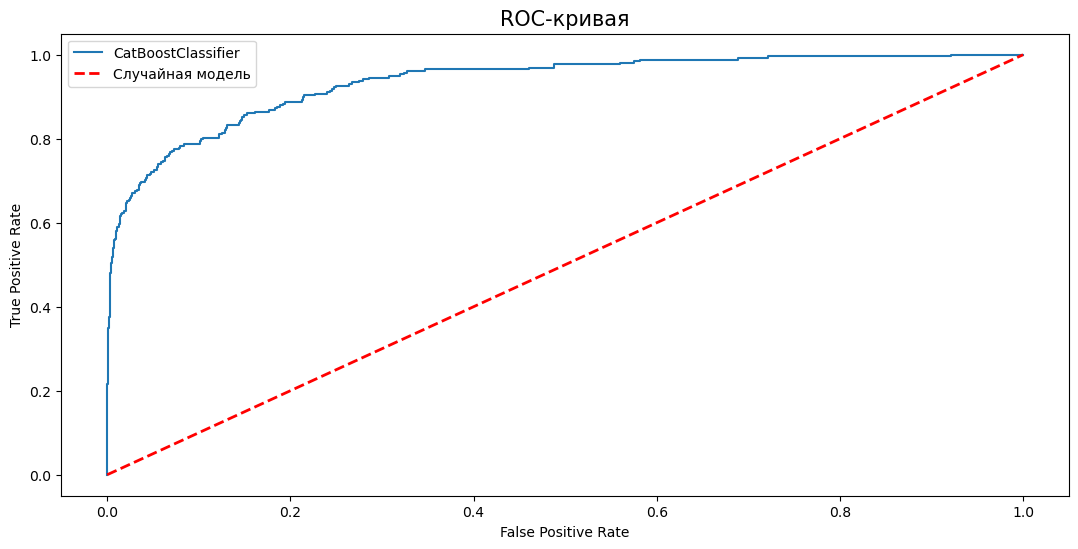

In [56]:
preds = grid_cat.best_estimator_.predict_proba(features_test)[:, 1]
fpr, tpr, _ = roc_curve(target_test, preds)

plt.figure(figsize=(13, 6))
plt.plot (fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
plt.title('ROC-кривая', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=10)
plt.xlabel('False Positive Rate', fontsize=10)
plt.legend(['CatBoostClassifier', 'Случайная модель'], loc='best')
plt.show() 

**Значимость признаков**

In [57]:
features_names = [] # названия признаков
for i in grid_cat.best_estimator_[:-1].get_feature_names_out():
    features_names.append(i.split('__')[1])

In [58]:
importance = pd.DataFrame(grid_cat.best_estimator_._final_estimator.feature_importances_,
                              index=features_names, columns=['rate']) \
                            .sort_values(by='rate', ascending=False)
importance # таблица значимости признаков

,rate
duration,69.339872
MonthlyCharges,12.850061
Type_Two year,2.864602
Partner_Yes,2.001868
Type_One year,1.729578
MultipleLines_Yes,1.456716
OnlineBackup_Yes,1.102979
PaymentMethod_Mailed check,1.078466
DeviceProtection_Yes,0.920996
TechSupport_Yes,0.841887


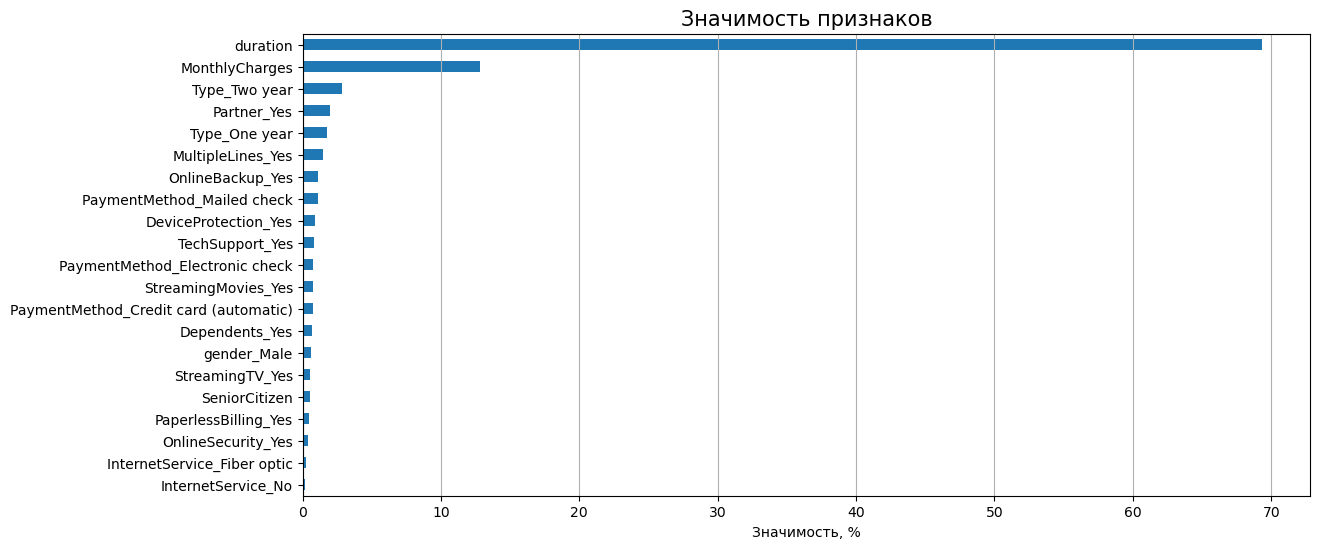

In [59]:
importance[::-1].plot(kind='barh', figsize=(13, 6), legend=False)
plt.xlabel('Значимость, %', fontsize=10)
plt.grid(axis='x')
plt.title('Значимость признаков', fontsize=15)
plt.show()

Можно заметить, что больше всего влияет значения Продолжительности пользования услугами и Месячная стоимость услуг. Наличие отдельных услуг значительно меньше влияет на результат предсказания модели

## Выводы

В процессе подготовки данных:
- Изучены и проанализированы данные о договорах клиентов и подключенных услуг
- Были найдены пропуски в столбцах с подключенными услугами и были заменены на *No* (отсутствие подключения услуги у клиента)
- Пропуски в столбце с общими затратами были обнаружены у новых клиентов и заполнены 0
- Изменены типы данных в столбцах с датами на тип *datetime* и приведены к численному типу значения в столбце с общими затратами
- Получен новый признак: продолжительность пользования услугами
- Удалены столбцы с датами начала и конца пользования услугами

Также была изучена корреляция признаков и найдена сильная зависимость между продолжительностью пользования услугами и суммарными тратами на услуги. Столбец с общими тратами был удален, чтобы избежать переобучение моделей. Изучен баланс классов выборки и определен явный перевес в сторону оставшихся клиентов (~84%)

Обучены модели *LogisticRegression*, *RandomForestClassifier*, *CatBoostClassifier*.

В итоге, лучшей моделью оказалась *CatBoostClassifier* с значением метрики AUC-ROC на тренировочной выборке ~0.92. Она была протестирована на тестовой выборке, где показала значение метрики AUC-ROC ~0.93. Построена ROC-кривая, исследована значимость признаков.